![title](plantilla.png)


El objetivo en este problema de regresión es construir un modelo para predecir el precio de una casa en Boston. Los datos se pueden cargar de los dataset que se encuentran en la libreria scikit-learn de python. Para solucionar realice las siguientes tareas:

1. Cargen los datos *boston* de la librería scikit learn.
2. Piensen como deberia ser el problema de regresión, formule el problema y aplique una regresion lineal multivariable normal, y una regularizada.
3. Modifique la matriz de regresores para obtener una estimación no lineal del precio de las casas. ¿Es necesario hacer esto?
4. Implemente una regresión utilizando LASSO.

Como el objetivo es evaluar sus conocimientos deben responder las siguientes preguntas:

1. ¿Qué modificación le hizó a la matriz de regresores? ¿Porqué hizó esos cambios?
2. ¿Que diferencias encuentra entre la regresión regularizada y la no regularizada?, ¿Cuál es mejor en su opinió? ¿Porqué?
3. ¿Cómo son los resultados proporcionados por LASSO, comparados con los que obtuvo con la regresion regularizada?
4. ¿Qué mejoras le haría al algoritmo? ¿Es un modelo lineal suficiente para solucionar este problema?
5. ¿Qué puede concluir si observa lso valores de los parámetros $\theta$? ¿Es bueno analizar directamente estos valores?
6. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión y como se aplicó en este proyecto.

Deben realizar su proyecto en grupos de 3 o 4 alumnos, y entregar un notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Nombre1__Apellido1_Regresión_1_ML.

**Nota:** Si las respuestas no son claras, o si su procedimiento nos está justificado, no se tendrá en cuenta. No olviden sus referencias.

**Solución:**

**1)** Primero cargamos las librerias necesaria para realizar nuestro taller y tambien los datos de la libreria sklearn, ponemos el comando warnings debido a que este dataset en estos momentos posee un problema de tipo etico con algunas variables que contiene.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sea 
from sklearn.datasets import load_boston
warnings.filterwarnings('ignore')
dataset = load_boston()

Ahora veamos que de consta nuestro conjunto de datos mediante dataset.DESCR, el cual explica el significado de cada variable. Hemos puesto tal información en la siguiente tabla.

In [ ]:
#print(dataset.DESCR)

Variable | Significado
:-----:|:-----| 
CRIM|Tasa de criminalidad per cápita por sector.
ZN|Proporción de suelo residencial zonificado para lotes  de más de 25,000 pies cuadrados|
INDUS|Proporción de acres comerciales no minoristas por sector.|
CHAS|Variable ficticia de Charles River (= 1 si el tramo limita con el río ; 0 en caso contrario)|
NOX |Concentración de óxidos nítricos (partes por 10 millones)|
RM|Promedio de cuartos por vivienda|
AGE|Proporción de unidades ocupadas por sus propietarios construidas antes de 1940|
DIS|Distancias ponderadas a cinco centros de empleo de Boston|
RAD|Índice de accesibilidad a las carreteras radiales|
TAX|tasa de impuesto a la propiedad de valor total por $\$10,000$|
PTRATIO|Ratio alumno-docente por sector|
B|$1000(Bk - 0.63)^{2}$, donde Bk es la proporción de negros por ciudad|
LSTAT|$\%$ de bajo estrato de la población|
MEDV|Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares|

Convertimos nuestro conjunto de datos a un data frame y verificamos la dimensión de estos.

In [2]:
boston = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston.shape

(506, 13)

Cabe aclarar que tenemos $506$ filas (observaciones) y $13$ columnas (variables), pero en la tabla anterior tenemos $14$ caracteristicas, esto se debe a que en el data frame de boston no está contenida nuestra variable a predecir o target, la cual es **MEDV**. Por eso la agregamos y posterioemente tenemos un primer acercamiento a nuestro conjunto de datos mediante la función head para para visualizar los primeros $5$ datos.

In [3]:
boston["target"]=dataset.target
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**2)** Como queremos ajustar un modelo de regresión lineal multivariada primero haremos un análisis de correlación entre las variables y mirar cuales podrían estar más correlacionadas con nuestro target. No obstante debemos tener especial cuidado con la multicolinealidad, esto lo explicaremos enseguida con nuestras variables. 

<AxesSubplot:>

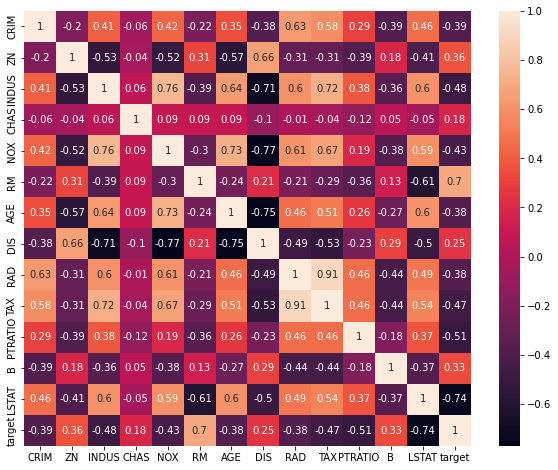

In [4]:
matriz_correlacion = boston.corr().round(2)
plt.figure(figsize=(10,8))
sea.heatmap(data=matriz_correlacion, annot=True)

De nuestra matriz de correlación podemos ver que la variable **RM** tiene una correlación de $0.7$ con nuestro target y por tanto podria ser una muy buena variable predictora para añadir al modelo, otra caracteristica que tiene una alta correlación es **LSTAT** en este caso tiene un correlación de $-0.74$ y por ultimo **PTRATIO** tiene una correlación de $-0.51$ con nuestro target. En este momento estariamos bastante tentados a colocar las caracteristicas **RM** y **LSTAT** como variables regresoras, no obstante no hemos analizado la colinealidad entre estas dos, en nuestro caso tienen una correlación de $-0.61$ la cual es medianamente alta, pero supongamos por un momento que queremos agregar a nuestro modelo las variables **RAD** y **TAX**, estas dos caracteristicas en particular tienen un correlación de $0.91$ y por tanto no deberiamos agregar estas dos variables en simultanea a nuestro modelo, ya que generaria un problema de colinealidad. Lo que hace que la colinealidad sea un problema grave en los modelos de regresión es que a la hora de calcular nuestro vector de parametros $\theta=(X^{T}X)^{-1}Xy$, la inversa de la matriz $X^{T}X$ será sensible a pequeños cambios, es decir que si ingresamos nuevos datos, la inversa de esta matriz cambiara mucho de una muestra a otra y por tanto tendremos una alta en la varianza en nuestro vector de parametros $\theta$. En general a las matrices que poseen este problema se les denomina matriz mal condicionada. En [1] podemos encontrar una medida de mal condicionamiento que viene dado por:
$$\kappa(X)=\sqrt{\displaystyle{\lambda_{máx}(X^{T}X)\over \lambda_{mín}(X^{T}X)}}\, \in [1,\infty)$$
donde $\lambda$ representa los eigenvalores de la matriz $X^{T}X$, el número de mal condicionamiento o número kappa da una idea de que tan mal condicionada está la matriz de diseño, en [2] podemos ver que para $\kappa(X)=1$ tenemos una matriz perfectamente condicionada, es decir que la colinealidad no está presente, para valores entre [5,10] son considerados como aceptables o posee un mal condicionamiento leve, si $\kappa \to \infty $ el mal condicionamiento tendera a ser más alto. 

Antes de crear el modelo veamos una grafica para apreciar mejor la correlación entre las variables RM, LSTAT, PTRATIO y nuestro target.

Text(0.5, 1.0, 'PTRATIO Vs Precio')

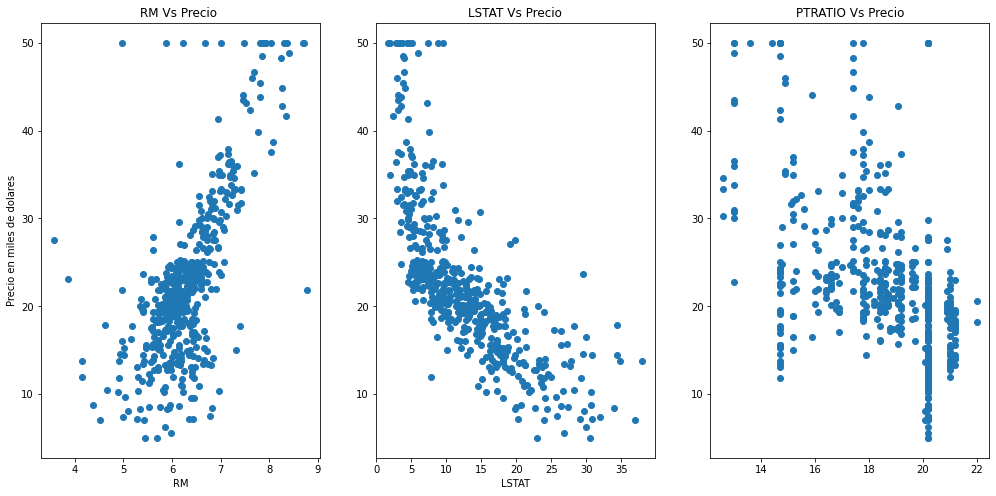

In [5]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(17,8))
ax1.scatter(boston['RM'], boston['target'])
ax1.set_title("RM Vs Precio ")
ax1.set_xlabel("RM")
ax1.set_ylabel("Precio en miles de dolares")
ax2.scatter(boston['LSTAT'], boston['target'])
ax2.set_title("LSTAT Vs Precio")
ax2.set_xlabel("LSTAT")
ax3.scatter(boston['PTRATIO'],boston['target'])
ax3.set_title("PTRATIO Vs Precio")

De nuestro analisis anterior proponemos un modelo de regresión lineal multivariada con la variables **RM**,**LSTAT** y **PTRATIO** configurado de la siguiente forma:

$$\text{target} = \theta_{1} \,\text{LSTAT} + \theta_{2}\,\text{RM} + \theta_{3}\, \text{PTRATIO} +\theta_{0}$$

In [6]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = boston['target']

Ahora partimos nuestro conjunto de datos en $80\%$ de entrenamiento y $20\%$ de testeo.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Creamos nuestros modelo de regresión lineal multivariada:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.display import display, Latex, Math

regresion = LinearRegression()
regresion.fit(X_train, Y_train)

LinearRegression()

Obtengamos los coeficientes de regresión estimados:

In [9]:
display(Math(r'\theta_{0}='),np.round(regresion.intercept_,2))
display(Math(r'(\theta_{1},\theta_{2},\theta_{3})='),np.round(regresion.coef_,2))

<IPython.core.display.Math object>

23.68

<IPython.core.display.Math object>

array([-0.65,  3.92, -0.95])

Por tanto nuestro modelo queda configurado de la siguiente forma:

$$\text{target} = -0.65\,\text{LSTAT} + 3.92\,\text{RM}- 0.95\,\text{PTRATIO}+23.68 $$

Veamos que tan bueno es nuestro modelo calculando su Error Cuadratico Medio (MSE) y el $R^{2}$ solo con los datos de entrenamiento:

In [11]:
y_train_predict = regresion.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict);print("Error Cuadratico Medio (Train):",round(mse,2))
r2 = r2_score(Y_train, y_train_predict);display(Latex(f'$R^{2}=$'),round(r2,2))

Error Cuadratico Medio (Train): 28.13


<IPython.core.display.Latex object>

0.67

Calculemos lo mismo pero ahora con el conjunto de testeo:

In [12]:
y_test_predict = regresion.predict(X_test)
rmse = mean_squared_error(Y_test, y_test_predict);print("Error Cuadratico Medio (Test):",round(rmse,2))
r21 = r2_score(Y_test, y_test_predict);display(Latex(f'$R^{2}=$'),round(r21,2))

Error Cuadratico Medio (Test): 24.15


<IPython.core.display.Latex object>

0.69

Podemos ver que el Error cuadratico medio y el $R^{2}$ no difieren considerablamente cuando los calculamos con el conjunto de entramiento y testeo, esto parece bueno, ya que pareciera que tenemos un modelo estable, no obstante el valor de $R^{2}$ no es tan bueno, recordemos que lo deseable es que esté proximo a $1$, pero no tanto como para causar un sobreajuste. Este valor de $R^{2}=0.69$ nos indica que el solo $69\%$ de la variación de nuestro target es explicada por nuestro regresores. 

**Regresión Regularizada:**

Aplicaremos una Regresión Ridge. En esta regresión la función a optimizar cambia un poco a la optimizada mediante OLS, recordemos que la función de costo de una regresión lineal usual es:

$$ ||y-X\theta||^{2}_{2}$$

y que es minimizada por el vector:

$$\theta=(X^{T}X)^{-1}X^{T}y$$

En el caso de la Regresión Ridge lo que buscamos minimizar ahora es la siguiente función de costo:

$$||y-X\theta||_{2}^{2}+\alpha ||\theta||_{2}^{2} $$

Notemos que la expresión de la izquierda es la misma que la de regresión lineal usual, salvo que ahora agregamos el termino $\alpha ||\theta||_{2}^{2}$ la cual contiene al hiperparametro $\alpha$ que se encargará de penalizar al vector de parametros $\theta$. Usualmente $\alpha$ se estima mediante CV (Cross Validation), pero tambien se puede estimar mediante BIC (Criterio de Información Bayesiana) o AIC (Criterio de Información de Akaike). Es claro que $\alpha>0$, si $\alpha=0$ no existe penalización y volveriamos al problema de regresión lineal usual. La Regresión Ridge originalmente fue propuesta en [3] y buscaban solucionar el problema de sobreajuste y tambien poder ayudar reducir las consecuencias de la multicolinealidad. Una ventaja de la Regresión Ridge es que se puede demostrar que tiene menor varianza que el estimador mediante OLS, una desventaja es que el estimador Ridge pierde la caracteristica de ser un estimador insesgado.

Al minimizar la función de costo de la Regresión Ridge obtenemos que esta es minimizada por el vector:

$$ \theta=(X^{T}X+\lambda I)^{-1}X^{T}y$$ 

Cabe aclara que existe un trade-off entre sesgo y varianza, ya que a medida que $\alpha \to \infty$ la varianza disminuye pero el sesgo crece, tambien es claro que si $\alpha \to \infty$ los coeficiente de regresión se irán aproximando a $0$, es por eso que encontrar el valor de $\alpha$ es muy importante en este modelo de regresión. En [4] se hace una discusión sobre la escogencia del $\alpha$ adecuado y además se recomienda con especial enfasis en normalizar las variables antes de calcular el estimador Ridge, ya que podría afectar seriamente algunas variables que difieren de otra caracteristica en escala.   

In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
ridge_reg = RidgeCV(normalize=True).fit(X_train,Y_train)

y_predict_ridge=ridge_reg.predict(X_test)
rmse = mean_squared_error(Y_test, y_predict_ridge);print("Error Cuadratico Medio (Test):",round(rmse,2))
r21 = r2_score(Y_test, y_predict_ridge);display(Latex(f'$R^{2}=$'),round(r21,2))



display(Math(r'$\alpha =$'),ridge_reg.alpha_)
display(Math(r'$(\theta_{1},\theta_{2},\theta_{3})$'),np.round(ridge_reg.coef_,2))

Error Cuadratico Medio (Test): 23.17


<IPython.core.display.Latex object>

0.7

<IPython.core.display.Math object>

0.1

<IPython.core.display.Math object>

array([-0.59,  3.88, -0.93])

Por lo general y en [4] se explica que el intercepto no se penaliza. La función RidgeCV hace la estimación de $\alpha$ y además lo hace mediante validación cruzada por default. Agregamos el parametro normalize = True, siguiendo la sugerencia de [3] y [4]. Por tanto nuestro modelo de regresión lineal ahora queda ajustado de la siguiente forma:

$$ target = -0.59\,LSTAT + 3.87\, RM -0.92\, PTRATIO + 23.68 $$

Notemos que los coeficientes de regresión Ridge son un poco más bajos (fueron penalizados) a comparación del modelo de regresión lineal usual, este pequeño cambio se debe a que hemos encontrado un valor pequeño para $\alpha=0.1$, como ya se dijo, a medida que $\alpha \to \infty$ los coeficientes tenderan a $0$..

Variable | Regresión Usual | Regresión Ridge
:-----:|:-----:|:----:| 
LSTAT|-0.65|-0.59|
RM|3.92|3.88|
PRTATIO|-0.95|-0.93|

Ahora vemos el $R^{2}$ de la regresión Ridge


In [14]:
display(Math(r'$R^{2}=$'),round(ridge_reg.score(X_train,Y_train),2))


<IPython.core.display.Math object>

0.67

Obtenemos un $R^{2}$ igual (al menos es sus dos primeros digitos) que al conseguido mediante regresión usual. Recordemos que el modelo no se vio penalizado de manera considerable y por tanto es normal esperarse que su $R^{2}$ tampoco cambie mucho.

**3)** Para ajustar un modelo de regresión lineal polinomica podemos proceder de igual forma (para estimar el vector de parametros) como lo hacemos con la regresión lineal usual, lo que cambia es que nuestra matriz de diseño deberá ser modificada, por ejemplo esta es nuestra matriz de diseño para una regresión lineal usual (la columnas de 1, solo indica que se hace con intercepto).


$$\begin{bmatrix} 
1 & x_{11} & \cdots & x_{1p} \\
1 & x_{21} & \cdots & x_{2p}\\ 
1 & x_{31} & \cdots & x_{3p}\\
\vdots & \vdots &\ddots &\vdots \\
1 & x_{n1} & \cdots & x_{np}
\end{bmatrix}$$

Para un modelo de regresión polinomial tendriamos la siguiente matriz (supongamos que el polinomio será de grado $m$):

$$\begin{bmatrix} 
1 & x_{11} & x_{12}^{2} &\cdots & x_{1p}^{m} \\
1 & x_{21} & x_{22}^{2}&\cdots & x_{2p}^{m}\\ 
1 & x_{31} & x_{32}^{2}&\cdots & x_{3p}^{m}\\
\vdots & \vdots &\vdots &\ddots & \vdots\\
1 & x_{n1} & x_{n2}^{2} & \cdots & x_{np}^{m}
\end{bmatrix}$$

Para crear nuestro modelo de regresión lineal polinomico multivariado proponemos que la variable **LSTAT** sea la que se eleve al cuadrado, esto viendo de nuevo la grafica scatter, parece ser que tiene una relación que tiende a ser cuadratica.



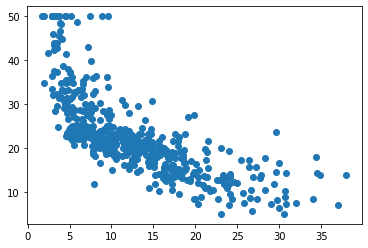

In [15]:
plt.scatter(boston['LSTAT'], boston['target'])

Para esto agregamos a nuestra matriz de diseño la columna **LSTAT2** que guardara el cuadrado del vector **LSTAT** y por tanto nuestro modelo de regresión lineal queda configurado de la siguiente forma:

$$taget = \theta_{1}\, \text{LSTAT}^{2} + \theta_{2}\, \text{LSTAT} + \theta_{3}\,\text{RM} + \theta_{4}\, \text{PTRATIO}+ \theta_{0}$$

In [16]:
X_nuevo=pd.DataFrame(np.c_[boston['LSTAT']**2,boston['LSTAT'], boston['RM']**2,boston['RM'],boston['PTRATIO']**2,boston['PTRATIO']], columns = ['LSTAT2','LSTAT','RM2','RM','PTRATIO2','PTRATIO'])
Y_nuevo=boston['target']
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_nuevo, Y_nuevo, test_size = 0.2, random_state=5)

regresion2 = LinearRegression()
regresion2.fit(X_train2, Y_train2)



LinearRegression()

Veamos si el rendimiento con esta nueva regresión ha mejorado a comparación de la primera:

In [17]:
print(regresion2.score(X_train2,Y_train2))
print(regresion2.coef_)
print(regresion2.intercept_)

0.7553204525122966
[ 1.95305367e-02 -1.32342227e+00  2.12745358e+00 -2.37688898e+01
  3.31221123e-02 -1.84150474e+00]
122.00206955462285


In [18]:
y_test_predict2 = regresion2.predict(X_test2)
rmse = mean_squared_error(Y_test2, y_test_predict2);print("Error Cuadratico Medio (Test):",round(rmse,2))
r21 = r2_score(Y_test2, y_test_predict2);display(Latex(f'$R^{2}=$'),round(r21,2))

Error Cuadratico Medio (Test): 13.36


<IPython.core.display.Latex object>

0.83

**Bibliografía** 

[1] Groß, Jürgen. (2003): Linear Regression. Springer-Verlag Berlin Heidelberg, Berlin. 

[2] Belsley, D.A., Kuh, E., Welsch, R.E. (1980): Regression Diagnostics. Wiley,
New York.

[3] Arthur Hoerl,Robert Kennard (1970). Ridge regression: Biased estimation for nonorthogonal problems. Technometrics.

[4] Gareth James, Daniela Witten, Trevor Hatie, and Robert Tibshirani (2021). An Introduction to Statistical
Learning with Applications in R. Springer Texts in Statistics